<a href="https://colab.research.google.com/github/emrullahozkilinc/machine-learning/blob/master/heart_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tabulate
import seaborn as sns
import xgboost
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [3]:
url="https://raw.githubusercontent.com/emrullahozkilinc/machine-learning/master/dataset/heart.csv"
data = pd.read_csv(url)
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


(array([ 1.,  0.,  6.,  5.,  7., 26., 19., 19., 12., 25., 32., 28., 44.,
        19., 19., 24.,  7.,  7.,  1.,  2.]),
 array([29. , 31.4, 33.8, 36.2, 38.6, 41. , 43.4, 45.8, 48.2, 50.6, 53. ,
        55.4, 57.8, 60.2, 62.6, 65. , 67.4, 69.8, 72.2, 74.6, 77. ]),
 <a list of 20 Patch objects>)

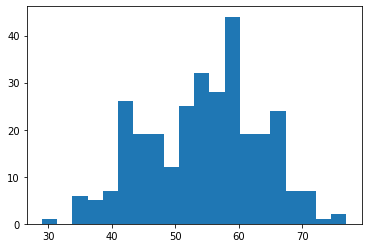

In [4]:
plt.hist(data['age'],bins=20)

([<matplotlib.patches.Wedge at 0x7f734d510a90>,
 [Text(-0.5986245291714798, 0.9228481310997082, 'Male'),
  Text(0.5986244427681994, -0.9228481871469777, 'Female')],
 [Text(-0.32652247045717075, 0.503371707872568, '68.3%'),
  Text(0.3265224233281087, -0.5033717384438059, '31.7%')])

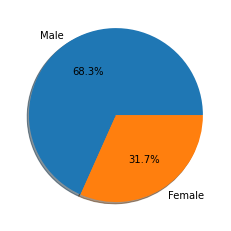

In [5]:
total_male = len(data.loc[data['sex']==1])
total_female = len(data.loc[data['sex']==0])

labels = ['Male','Female']

plt.pie([total_male, total_female], labels=labels, autopct='%1.1f%%', shadow=True, )

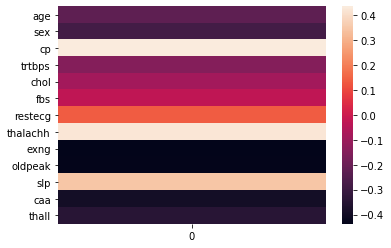

In [6]:
correlations = np.corrcoef(data.T)
corr_target_all = correlations[-1].reshape(14,1)
corr_target = corr_target_all[:13]
sns.heatmap(corr_target, yticklabels=data.columns[:13],)

In [7]:
corr_target_edited = pd.DataFrame(corr_target, index=data.columns[:13], columns=['Absoluted Correlations'])
corr_target_edited = np.abs(corr_target_edited)
corr_target_edited.sort_values(by=['Absoluted Correlations'], ascending=False)

,Absoluted Correlations
exng,0.436757
cp,0.433798
oldpeak,0.430696
thalachh,0.421741
caa,0.391724
slp,0.345877
thall,0.344029
sex,0.280937
age,0.225439
trtbps,0.144931


In [8]:
X = data.iloc[:,:13]
y = data['output']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [10]:
def ada_classifier(depth, n_estimators):
  classifier = AdaBoostClassifier(
      DecisionTreeClassifier(max_depth=depth),
      n_estimators=n_estimators)

  return classifier

In [11]:
ada = ada_classifier(1,50).fit(X_train, y_train)
predicted_ada = ada.predict(X_test)

In [34]:
conf_mat = {}

In [35]:
ada_conf = confusion_matrix(y_test, predicted_ada)
conf_mat['ada'] = ada_conf

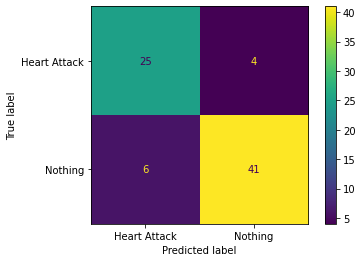

In [13]:
plot_confusion_matrix(ada, X_test, y_test, display_labels=['Heart Attack','Nothing'])

In [14]:
gradient_classifier = GradientBoostingClassifier(loss='exponential')

In [15]:
gradient = gradient_classifier.fit(X_train, y_train)
predicted_gradient = gradient.predict(X_test)

In [36]:
gradient_conf = confusion_matrix(y_test, predicted_gradient)
conf_mat['gradient'] = gradient_conf

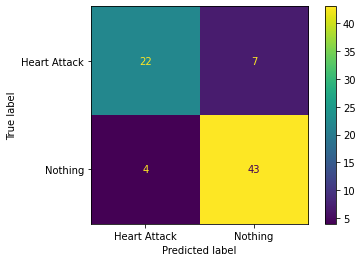

In [16]:
plot_confusion_matrix(gradient, X_test, y_test, display_labels=['Heart Attack','Nothing'])

In [28]:
xgb = xgboost.XGBClassifier()

In [29]:
xgb.fit(X_train, y_train)
predicted_xgboost = xgb.predict(X_test)

In [37]:
xgb_conf = confusion_matrix(y_test, predicted_xgboost)
conf_mat['xgb'] = xgb_conf

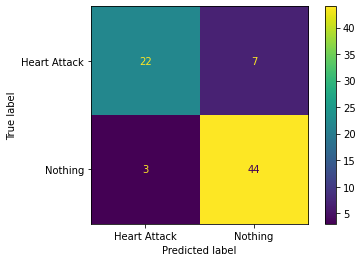

In [30]:
plot_confusion_matrix(xgb, X_test, y_test, display_labels=['Heart Attack','Nothing'])

In [42]:
def print_metrics(conf_matrix):
  TP = conf_matrix[0,0]
  FN = conf_matrix[0,1]
  FP = conf_matrix[1,0]
  TN = conf_matrix[1,1]
  print('----------------------------')
  print('Accuracy:',    round(((TP+TN)/(TP+FN+FP+TN)),3))
  print('Sensitivity:', round(((TP)/(TP+FN)),3))
  print('Specificity:', round(((TN)/(FP+TN)),3))
  print('Precision:',   round(((TP)/(TP+FP)),3))
  print('Negative Predictive Value:',    round(((TN)/(FN+TN)),3))
  print('----------------------------\n')

In [43]:
for x,y in conf_mat.items():
  print(x, ' results:')
  print_metrics(y)

ada  results:
----------------------------
Accuracy: 0.868
Sensitivity: 0.862
Specificity: 0.872
Precision: 0.806
Negative Predictive Value: 0.911
----------------------------

gradient  results:
----------------------------
Accuracy: 0.855
Sensitivity: 0.759
Specificity: 0.915
Precision: 0.846
Negative Predictive Value: 0.86
----------------------------

xgb  results:
----------------------------
Accuracy: 0.868
Sensitivity: 0.759
Specificity: 0.936
Precision: 0.88
Negative Predictive Value: 0.863
----------------------------

